In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import conda_installer
from rdkit import Chem
from deepchem.feat.graph_features import atom_features as get_atom_features
import rdkit
import pickle
import matplotlib.pyplot as plt
from models.PGCN_model_multiloss import get_trained_model, test_model

2025-04-30 21:44:05.284728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-30 21:44:05.349456: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normaliz

In [2]:
X_folds= pickle.load(open('Datasets/X_folds_LT_4.pkl', 'rb'))
y_folds = pickle.load(open('Datasets/y_folds_LT_4.pkl', 'rb'))

In [3]:
K = 4
epoch = 200
hists = []
test_loss = []
predicts_train = []
predicts_test = []

for k in range(K):
    X_train = []
    for i in range(K):
        if i != k:
            X_train += X_folds[i]
    X_test = X_folds[k]
    y_train = np.concatenate(np.array([y_folds[i] for i in range(K) if i != k]), 0)
    y_test = np.array(y_folds[k])
    #  Passing the X_train and x_add_train to train the model.
    hs, m, x_converted = get_trained_model(X_train, y_train, epochs = epoch, physics_weight = 0.0005,max_num_atoms = 2000, n_features = 41)
    with open('Datasets/PGCN_vm2_ent_K%d_W_n.pkl' % k, 'wb') as f:
        pickle.dump([m.layers[0].w_n, m.layers[0].w_n], f)
        f.close()
    predicts_train.append(m.predict(x_converted, batch_size=len(X_train)))
    hists.append(hs)
    X_test[0].shape
    k_loss, x_converted = test_model(X_test, y_test, m, max_num_atoms = 2000, n_features = 41)
    test_loss.append(k_loss)
    predicts_test.append(m.predict(x_converted, batch_size=len(X_test)))
    

2025-04-30 21:44:16.444948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-30 21:44:16.444976: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (curie.cluster): /proc/driver/nvidia/version does not exist
2025-04-30 21:44:16.445741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
Inside call
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Inside call
1/1 [==============================] - 71s 71s/step - loss: 12.4960
Epoch 2/200
1/1 [==============================] - 18s 18s/step - loss: 10.3704
Epoch 3/200
1/1 [==============================] - 19s 19s/step - loss: 8.3073
Epoch 4/200
1/1 [==============================] - 19s 19s/step - loss: 6.3680
Epoch 5/200
1/1 [==============================] - 19s 19s/step - loss: 4.7078
Epoch 6/200
1/1 [==============================] - 20s 20s/step - loss: 3.7070
Epoch 7/200
1/1 [==============================] - 19s 19s/step - loss: 3.7949
Epoch 8/200
1/1 [==============================] - 19s 19s/step - loss: 4.5194
Epoch 9/200
1/1 [==============================] - 19s 19s/step - loss: 5.1671
Epoch 10/200
1/1 [==============================] - 18s 18s/st

KeyboardInterrupt: 

In [15]:
# with open('PGCN_VM2_K%d_fold_hists.pkl' % K, 'wb') as file:
#     pickle.dump(hists, file)
# with open('PGCN_PG_K%d_fold_test.pkl' % K, 'wb') as file:
#     pickle.dump(test_loss, file)
# with open('PGCN_PG_K%d_fold_train_pred.pkl' % K, 'wb') as file:
#     pickle.dump(predicts_train, file)
# with open('PGCN_PG_K%d_fold_test_pred.pkl' % K, 'wb') as file:
#     pickle.dump(predicts_test, file)

In [4]:
%pwd

'/home/lthoma21/BFE-Loss-Function/FINAL-HOSTGUEST-FILES'

In [2]:
import pickle
import numpy as np
K = 4
PGCN_PG_hists = pickle.load(open('Datasets/PGCN_VM2_K4_fold_hists.pkl', 'rb'))
PGCN_PG_loss = np.array(pickle.load(open('Datasets/PGCN_VM2_K4_fold_test.pkl', 'rb')))
PGCN_PG_pred = pickle.load(open('Datasets/PGCN_VM2_K4_fold_train_pred.pkl', 'rb'))


In [3]:
PGCN_PG_hists[0][-1],PGCN_PG_hists[1][-1],PGCN_PG_hists[2][-1],PGCN_PG_hists[3][-1]

(3.516787052154541, 3.7367451190948486, 3.5972952842712402, 3.5650405883789062)

In [2]:
PGCN_PG_loss

array([4.22463322, 3.30994749, 3.74176717, 3.81422496])

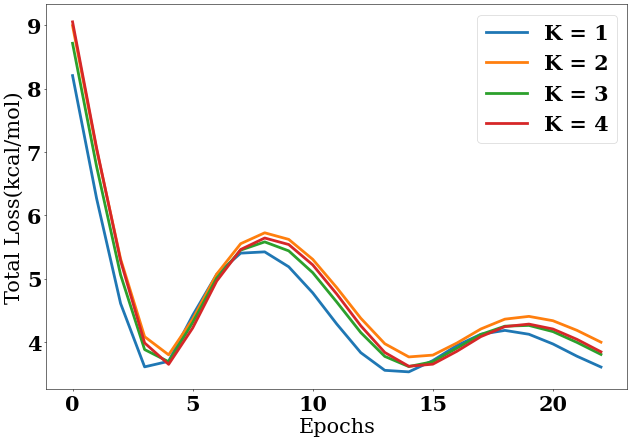

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)
figure(figsize=(15, 10), dpi=50)
for i in range(K):
    plt.plot(np.array(PGCN_PG_hists[i][2:25]) - .1, label='K = %d' % (i + 1), linewidth=4)
plt.xlabel('Epochs')
plt.ylabel('Total Loss(kcal/mol)')

plt.legend()
plt.savefig('Graphs/PGCN_VM2_K_fold_multiloss.png',dpi=100, bbox_inches='tight')